<a href="https://colab.research.google.com/github/YounSooKimTech/Greg_Python/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Easy Example

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
hours = [0.5, 0.75, 1, 1.5, 1.75, 1.75, 2 , 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5 ]
len(hours)

19

In [5]:
pass_exam = [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,1]
len(pass_exam)

19

In [6]:
df = pd.DataFrame({"hours":hours, "pass_exam":pass_exam})
df

,hours,pass_exam
0,0.50,0
1,0.75,0
2,1.00,0
3,1.50,0
4,1.75,0
5,1.75,1
6,2.00,0
7,2.25,1
8,2.50,0
9,2.75,1


In [7]:
log_reg = sm.formula.logit(formula = "pass_exam ~ hours", data=df).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.416754
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              pass_exam   No. Observations:                   19
Model:                          Logit   Df Residuals:                       17
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                  0.3975
Time:                        00:26:40   Log-Likelihood:                -7.9183
converged:                       True   LL-Null:                       -13.143
Covariance Type:            nonrobust   LLR p-value:                  0.001226
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8839      1.782     -2.180      0.029      -7.377      -0.391
hours          1.4469      0.

In [8]:
np.exp(log_reg.params)

Intercept    0.020570
hours        4.249909
dtype: float64

In [9]:
# when hours = 1


log_odds = -3.8839 + 1.4469 * 1
print(log_odds)

odds = np.exp(log_odds)
print(odds)

proba = 1 / (1+np.exp(-log_odds))
print(proba)

-2.4370000000000003
0.08742272663271697
0.08039442664898844


In [10]:
log_reg.predict(df["hours"])

0     0.040680
1     0.057392
2     0.080392
3     0.152700
4     0.205567
5     0.205567
6     0.270886
7     0.347872
8     0.433722
9     0.523743
10    0.612247
11    0.693916
12    0.764987
13    0.870306
14    0.905970
15    0.932586
16    0.952067
17    0.966123
18    0.983275
dtype: float64

In [11]:
# Logistic Regression with sklearn library (ML)

from sklearn.linear_model import LogisticRegression

X = df[["hours"]]
y = df[["pass_exam"]]

log_reg2 = LogisticRegression(penalty="none")
log_reg2.fit(X, y)

print(log_reg2.intercept_)
print(log_reg2.coef_)

print(log_reg2.predict(df[["hours"]]))

print(log_reg2.predict_proba(df[["hours"]])[:, 1])

[-3.88392126]
[[1.44688148]]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[0.0406803  0.05739121 0.08039149 0.15269749 0.2055634  0.2055634
 0.27088081 0.34786482 0.43371311 0.52373286 0.61223654 0.69390585
 0.76497728 0.87029896 0.90596427 0.93258202 0.95206401 0.96612075
 0.98327406]


# If I have the time to do this part
# Exercise with Titanic Dataset

In [12]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
# make a logistic regression 
# y = survived
# X = sex, age, fare
# you need to dummy code the sex
# get the log_odds equation
# get the coefficient for interpretation











# hide it

In [14]:
# survived = age + sex + fare

df_sub = df[["sex", "age", "fare", "survived"]]
df_sub.head()

,sex,age,fare,survived
0,male,22.0,7.2500,0
1,female,38.0,71.2833,1
2,female,26.0,7.9250,1
3,female,35.0,53.1000,1
4,male,35.0,8.0500,0


In [15]:
# dummy coding for categorical variable
df_sub["D_sex"] = df_sub["sex"].map({"male":0, "female":1})
df_sub.head()

,sex,age,fare,survived,D_sex
0,male,22.0,7.2500,0,0
1,female,38.0,71.2833,1,1
2,female,26.0,7.9250,1,1
3,female,35.0,53.1000,1,1
4,male,35.0,8.0500,0,0


In [16]:
log_reg_3 = sm.formula.logit(formula="survived~D_sex + age + fare", data=df_sub).fit()
print(log_reg_3.summary())

Optimization terminated successfully.
         Current function value: 0.501450
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            3
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                  0.2576
Time:                        00:26:42   Log-Likelihood:                -358.04
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.419e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4128      0.231     -6.119      0.000      -1.865      -0.960
D_sex          2.3476      0.

In [17]:
print(log_reg_3.params)

Intercept   -1.412758
D_sex        2.347599
age         -0.010570
fare         0.012773
dtype: float64


In [18]:
print(np.exp(log_reg_3.params))

Intercept     0.243471
D_sex        10.460420
age           0.989486
fare          1.012855
dtype: float64


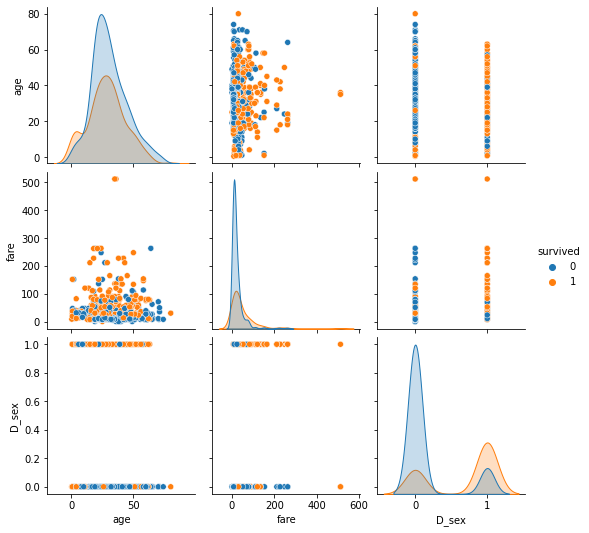

In [19]:
sns.pairplot(df_sub, hue="survived")

In [20]:
log_reg_3.predict(df_sub[["D_sex", "age", "fare"]])

0      0.174699
1      0.809026
2      0.681627
3      0.776112
4      0.157113
         ...   
886    0.177689
887    0.753470
888         NaN
889    0.213429
890    0.160840
Length: 891, dtype: float64